# Cleaning Image Dataset

This notebook shows how you can use fastdup to clean an image dataset.

## Installation & Setting Up

This notebook is written to be run on [Google Colab](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb). If you're running fastdup locally, view the installation instructions for your operating system [here](https://visual-layer.readme.io/docs/installation).

In [ ]:
!pip install pip -U
!pip install fastdup
!pip install pandas
!pip install matplotlib
!pip install wurlitzer
%load_ext wurlitzer

## Download food-101 Dataset

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xf food-101.tar.gz

## Import and Run fastdup

In [4]:
import fastdup
fastdup.__version__



'0.903'

In [5]:
fd = fastdup.create(work_dir="fastdup_food101_work_dir/", input_dir="food-101/images/")

> **NOTE**: If you're running this example on Google Colab, we recommend running with `num_images=40000` in the following cell. This limits fastdup to run on 40000 images instead of the entire dataset which takes shorter to complete on Google Colab.

In [6]:
fd.run(num_images=40000) # runs fastdup on 40000 images in the dataset
fd.run()                 # runs fastdup on the entire dataset

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-03-20 12:16:34 [INFO] Going to loop over dir food-101/images
2023-03-20 12:16:35 [INFO] Found total 101000 images to run on
[■■■■■■■■■■■■■■■■■■■■■■                            ] 43% Estimated: 2 Minutes 0 Features■                                      ] 23% Estimated: 3 Minutes 0 Features                         ] 36% Estimated: 2 Minutes 0 Features

## Broken Images

## Duplicates

## Outliers

## Dark, Bright and Blurry Images

# Find duplicates

In [5]:
# visualize clusters of duplicate images
fd.vis.component_gallery(max_width=800)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
# get a list of clusters with duplicate images using connected components
cc_df, _ = fd.connected_components()
cc_df[cc_df['count'] > 0.0].sort_values(by=['count'], ascending=False).head()

,fastdup_id,component_id,sum,count,mean_distance,min_distance,max_distance,img_filename,error_code,is_valid
19859,19859,19811,5.8648,6.0,0.9775,0.9721,0.9856,chicken_quesadilla/535057.jpg,VALID,True
21874,21874,21803,6.0000,6.0,1.0000,1.0000,1.0000,chocolate_cake/55122.jpg,VALID,True
21854,21854,21803,6.0000,6.0,1.0000,1.0000,1.0000,chocolate_cake/49494.jpg,VALID,True
19862,19862,19811,5.8648,6.0,0.9775,0.9721,0.9856,chicken_quesadilla/535546.jpg,VALID,True
19861,19861,19811,5.8648,6.0,0.9775,0.9721,0.9856,chicken_quesadilla/535532.jpg,VALID,True


## Connected Components Grouping

In [7]:
# a function to group connected components
def get_clusters(df, sort_by='count', min_count=2, ascending=False):
    # columns to aggregate
    agg_dict = {'img_filename': list, 'mean_distance': max, 'count': len}

    if 'label' in df.columns:
        agg_dict['label'] = list
    
    # filter by count
    df = df[df['count'] >= min_count]
    
    # group and aggregate columns
    grouped_df = df.groupby('component_id').agg(agg_dict)
    
    # sort
    grouped_df = grouped_df.sort_values(by=[sort_by], ascending=ascending)
    return grouped_df

In [8]:
# get clusters using connected components
cluster_df = get_clusters(cc_df)
cluster_df.head(3)

,img_filename,mean_distance,count
component_id,,,
26465,"[crab_cakes/2780617.jpg, crab_cakes/2780621.jpg, crab_cakes/2780623.jpg]",0.9759,3
21803,"[chocolate_cake/49494.jpg, chocolate_cake/51717.jpg, chocolate_cake/55122.jpg]",1.0000,3
35796,"[escargots/637185.jpg, escargots/637187.jpg, escargots/637188.jpg]",0.9798,3


In [9]:
# get clusters sorted differently
get_clusters(cc_df, sort_by='mean_distance').head(3)

,img_filename,mean_distance,count
component_id,,,
131,"[apple_pie/1461580.jpg, apple_pie/1469191.jpg]",1.0,2
41128,"[french_onion_soup/1741871.jpg, french_onion_soup/1741875.jpg]",1.0,2
57729,"[hummus/620711.jpg, hummus/622847.jpg]",1.0,2


In [10]:
# It's a good start, but as we can see there are not that many duplicates here, and the data may contain more.
# Let's lower the threshold a bit and re-evaluate the duplicates case.

## Re-run with lower threshold
Now we have more clusters containing more of the images, and we are able to remove highly similar images with higher recall.

In [11]:
# run with ccthreshold = 0.9 compared to default 0.96
fd.run(ccthreshold=0.9, overwrite=True)
fd.summary()

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-03-01 11:48:22 [INFO] Going to loop over dir food-101/images
2023-03-01 11:48:24 [INFO] Found total 101000 images to run on
2023-03-01 12:19:09 [INFO] Found total 101000 images to run on
2023-03-01 12:29:58 [INFO] 648922) Finished write_index() NN model
2023-03-01 12:29:58 [INFO] Stored nn model index file fastdup_food101/nnf.index
2023-03-01 12:32:14 [INFO] Total time took 2630145 ms
2023-03-01 12:32:14 [INFO] Found a total of 170 fully identical images (d>0.990), which are 0.06 %
2023-03-01 12:32:14 [INFO] Found a total of 88 nearly identical images(d>0.980), which are 0.03 %
2023-03-01 12:32:14 [INFO] Found a total of 5236 above threshold images (d>0.900), which are 1.73 %
2023-03-01 12:32:14 [INFO] Found a total of 10100 outlier images         (d<0.050), which are 3.33 %
2023-03-01 12:32:14 [INFO] Min distance found 0.379 max distance 1.000
2023-03-01 12:32:14 [INFO] Running connected components for cct

['Dataset contains 101000 images',
 'Valid images are 100.00% (101,000) of the data, invalid are 0.00% (0) of the data',
 'Similarity:  1.70% (1,718) belong to 30 similarity clusters (components).',
 '98.30% (99,282) images do not belong to any similarity cluster.',
 'Largest cluster has 79 (0.08%) images.',
 'For a detailed analysis, use `.connected_components()`\n(similarity threshold used is 0.9, connected component threshold used is 0.9).\n',
 'Outliers: 5.97% (6,029) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers(data=True)`.']

In [12]:
# Now we see a much larger amount of images clustered together
cc90_df, _ = fd.connected_components()
cc90_df[cc90_df['count'] > 0.0].sort_values(by=['count'], ascending=False).head()

,fastdup_id,component_id,sum,count,mean_distance,min_distance,max_distance,img_filename,error_code,is_valid
25103,25103,24810,73.0287,79.0,0.9244,0.9004,0.9467,club_sandwich/1318118.jpg,VALID,True
40109,40109,24810,73.0287,79.0,0.9244,0.9004,0.9467,french_fries/147628.jpg,VALID,True
40824,40824,24810,73.0287,79.0,0.9244,0.9004,0.9467,french_fries/3907871.jpg,VALID,True
40807,40807,24810,73.0287,79.0,0.9244,0.9004,0.9467,french_fries/3832957.jpg,VALID,True
40787,40787,24810,73.0287,79.0,0.9244,0.9004,0.9467,french_fries/3746805.jpg,VALID,True


In [13]:
# let's see the new clusters
fd.vis.component_gallery(max_width=800)

Output hidden; open in https://colab.research.google.com to view.

## Get a list of duplicates to remove

In [14]:
# List the largest clusters. These include non identical but larger clusters.
clusters_df = get_clusters(cc90_df)
clusters_df.head(3)

,img_filename,mean_distance,count
component_id,,,
24810,"[club_sandwich/1297247.jpg, club_sandwich/1318118.jpg, club_sandwich/1886101.jpg, club_sandwich/2778614.jpg, club_sandwich/3106065.jpg, club_sandwich/588478.jpg, french_fries/1099260.jpg, french_fries/1295274.jpg, french_fries/1361604.jpg, french_fries/1384733.jpg, french_fries/147628.jpg, french_fries/1610240.jpg, french_fries/1692353.jpg, french_fries/1700344.jpg, french_fries/1712331.jpg, french_fries/1740113.jpg, french_fries/1810352.jpg, french_fries/1969264.jpg, french_fries/2073415.jpg, french_fries/2246387.jpg, french_fries/2348229.jpg, french_fries/2369999.jpg, french_fries/2700217.jpg, french_fries/2761796.jpg, french_fries/2885926.jpg, french_fries/2936284.jpg, french_fries/3030853.jpg, french_fries/3069835.jpg, french_fries/3359887.jpg, french_fries/3405511.jpg, french_fries/3423618.jpg, french_fries/3499831.jpg, french_fries/3669402.jpg, french_fries/3673168.jpg, french_fries/3697215.jpg, french_fries/3746805.jpg, french_fries/3832957.jpg, french_fries/3907871.jpg, french_fries/467106.jpg, french_fries/889641.jpg]",0.9244,40
18229,"[chicken_curry/2394967.jpg, chicken_curry/2701143.jpg, chicken_curry/882723.jpg, hot_and_sour_soup/1151861.jpg, hot_and_sour_soup/1167380.jpg, hot_and_sour_soup/1400511.jpg, hot_and_sour_soup/1617113.jpg, hot_and_sour_soup/1670529.jpg, hot_and_sour_soup/2041812.jpg, hot_and_sour_soup/2367229.jpg, hot_and_sour_soup/2377494.jpg, hot_and_sour_soup/2520927.jpg, hot_and_sour_soup/3086202.jpg, hot_and_sour_soup/3113531.jpg, hot_and_sour_soup/3286625.jpg, hot_and_sour_soup/3428336.jpg, hot_and_sour_soup/3452669.jpg, hot_and_sour_soup/3552976.jpg, hot_and_sour_soup/3567487.jpg, hot_and_sour_soup/3568665.jpg, hot_and_sour_soup/3601021.jpg, hot_and_sour_soup/3706507.jpg, hot_and_sour_soup/387487.jpg, hot_and_sour_soup/478316.jpg, hot_and_sour_soup/564763.jpg, lobster_bisque/1346617.jpg, lobster_bisque/1826587.jpg, lobster_bisque/2917736.jpg, lobster_bisque/3282626.jpg, lobster_bisque/3319694.jpg, lobster_bisque/3358721.jpg, lobster_bisque/3414592.jpg, lobster_bisque/3466502.jpg]",0.9250,33
26394,"[crab_cakes/3467918.jpg, pad_thai/1709738.jpg, pad_thai/3059603.jpg, spaghetti_bolognese/3565695.jpg, spaghetti_carbonara/1117183.jpg, spaghetti_carbonara/1390373.jpg, spaghetti_carbonara/1559267.jpg, spaghetti_carbonara/1668631.jpg, spaghetti_carbonara/1739526.jpg, spaghetti_carbonara/1891700.jpg, spaghetti_carbonara/190173.jpg, spaghetti_carbonara/1936669.jpg, spaghetti_carbonara/1940255.jpg, spaghetti_carbonara/2228065.jpg, spaghetti_carbonara/2281641.jpg, spaghetti_carbonara/2567706.jpg, spaghetti_carbonara/2774715.jpg, spaghetti_carbonara/2796656.jpg, spaghetti_carbonara/2835081.jpg, spaghetti_carbonara/2967972.jpg, spaghetti_carbonara/2980079.jpg, spaghetti_carbonara/3045854.jpg, spaghetti_carbonara/3377897.jpg, spaghetti_carbonara/3581296.jpg, spaghetti_carbonara/3708340.jpg, spaghetti_carbonara/3908531.jpg, spaghetti_carbonara/560793.jpg, spaghetti_carbonara/733714.jpg, spaghetti_carbonara/755025.jpg]",0.9279,29


In [15]:
# List the clusters with the highest similarity. These are identical but smaller clusters.
get_clusters(cc90_df, sort_by='mean_distance').head(3)

,img_filename,mean_distance,count
component_id,,,
131,"[apple_pie/1461580.jpg, apple_pie/1469191.jpg]",1.0,2
31820,"[dumplings/167000.jpg, dumplings/180290.jpg]",1.0,2
48041,"[greek_salad/857079.jpg, greek_salad/862426.jpg]",1.0,2


In [16]:
# First sample from each cluster that is kept
cluster_images_to_keep = []
cluster_images_to_discard = []

for cluster_file_list in clusters_df.img_filename:
    # keep first file, discard rest
    keep = cluster_file_list[0]
    discard = cluster_file_list[1:]
    
    cluster_images_to_keep.append(keep)
    cluster_images_to_discard.extend(discard)

cluster_images_to_discard = set(cluster_images_to_discard)
print(f"Found {len(cluster_images_to_discard)} highly similar images to discard")

Found 2153 highly similar images to discard


# Find outliers

In [17]:
# show furthest outliers
fd.outliers().head(5)

,index,outlier,nearest,distance,img_filename_outlier,error_code_outlier,is_valid_outlier,img_filename_nearest,error_code_nearest,is_valid_nearest
0,10099,9797,96131,0.379365,breakfast_burrito/462294.jpg,VALID,True,tacos/1505262.jpg,VALID,True
1,10098,63325,38290,0.429241,macarons/2117640.jpg,VALID,True,fish_and_chips/2079080.jpg,VALID,True
2,10095,96131,83667,0.515785,tacos/1505262.jpg,VALID,True,red_velvet_cake/3143813.jpg,VALID,True
3,10094,89017,25421,0.528563,shrimp_and_grits/1047420.jpg,VALID,True,club_sandwich/2465517.jpg,VALID,True
4,10093,95577,22575,0.546918,sushi/3100962.jpg,VALID,True,chocolate_mousse/303176.jpg,VALID,True


100%|██████████| 20/20 [00:00<00:00, 7099.36it/s]

fastdup_food101/galleries/outliers_20230301125846/food-101_images_breakfast_burrito_462294_9797.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_macarons_2117640_63325.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_tacos_1505262_96131.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_shrimp_and_grits_1047420_89017.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_sushi_3100962_95577.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_pho_2399877_75357.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_pho_1840846_75236.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_chocolate_cake_2518457_21410.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_red_velvet_cake_2894652_83590.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_macarons_3785921_63762.0.jpg.jp

fastdup_food101/galleries/outliers_20230301125846/food-101_images_pad_thai_2614597_70494.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_prime_rib_587532_79858.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_macarons_2591602_63463.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_tacos_1091159_96024.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_hamburger_1608876_53171.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_frozen_yogurt_3577020_45688.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_peking_duck_388951_74793.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_steak_2788759_93480.0.jpg.jpg
fastdup_food101/galleries/outliers_20230301125846/food-101_images_ice_cream_1837798_58194.0.jpg.jpg
Stored outliers visual view in  fastdup_food101/galleries/outliers_20230301125846/outliers.html



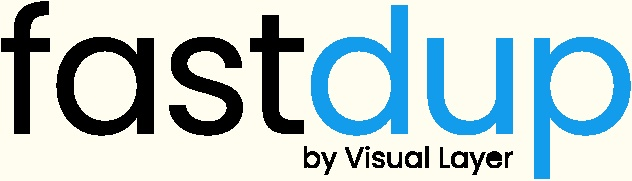
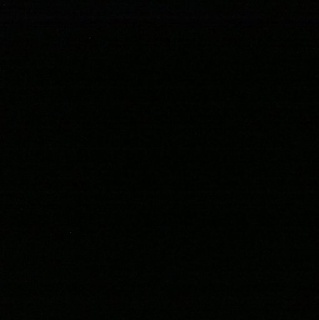
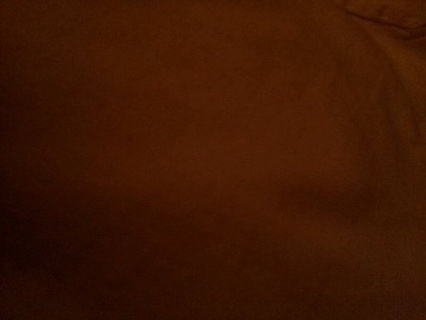
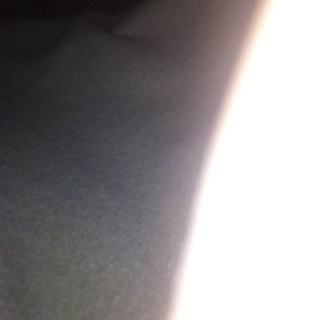
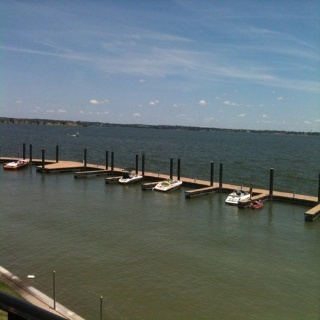
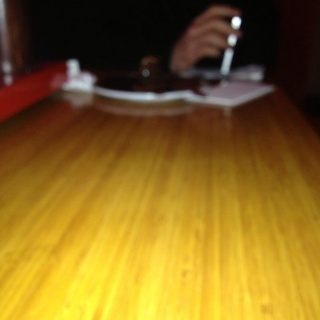
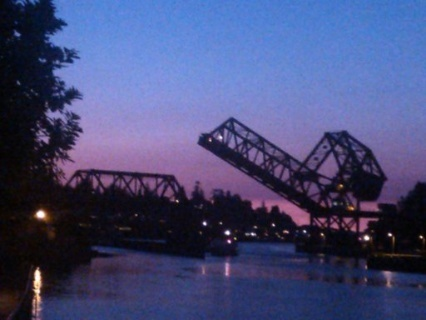
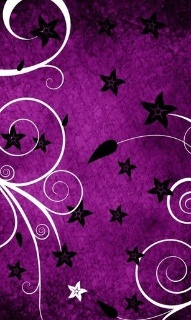
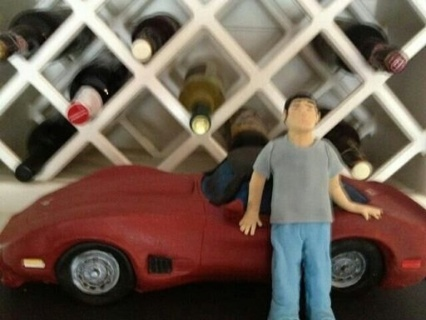
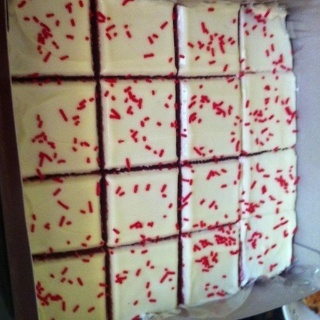
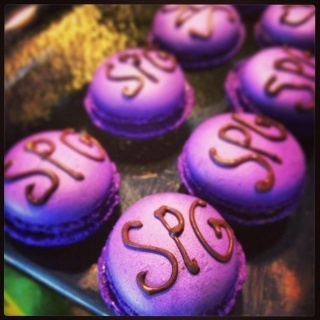
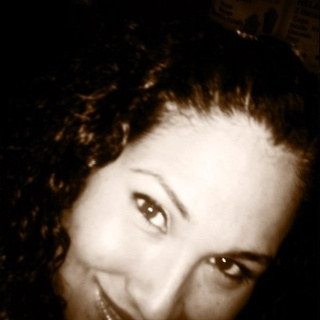
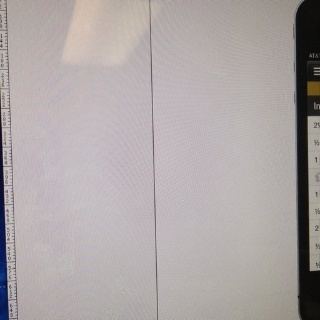
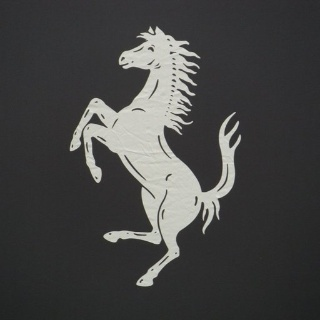
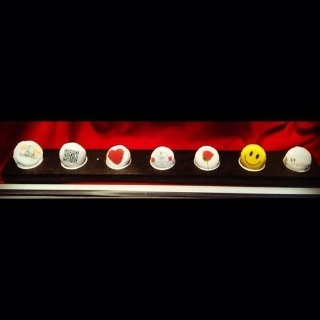
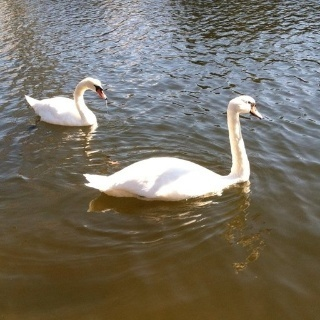
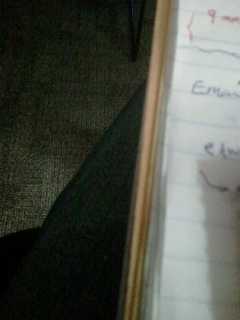
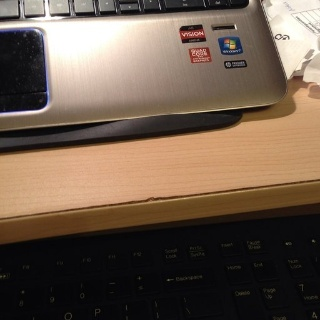
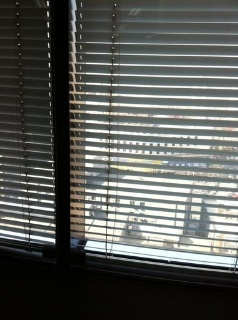
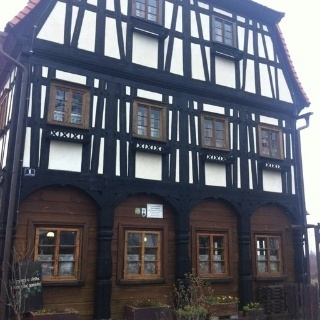
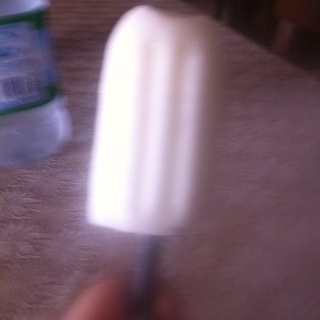

In [18]:
# visualize outliers
fd.vis.outliers_gallery()

# Remove broken images
Using fastdup we are able to recover a list of files that are corrupted or that could not be loaded from various reasons. The reason is listed for each image. We will fetch them, and add them to our list of images to remove. Food-101 is meticoulsly curated, so just for the sake of demonstration we've added one empty image.

In [19]:
inv = fd.invalid_instances()
inv

,img_filename,fastdup_id,error_code,is_valid


In [20]:
inv = pd.DataFrame([['apple_pie/broken_image.jpg', 101001, 'ERROR_ZERO_SIZE_FILE', False]], columns=[inv.columns])
inv

,img_filename,fastdup_id,error_code,is_valid
0,apple_pie/broken_image.jpg,101001,ERROR_ZERO_SIZE_FILE,False


# Find dark, bright and blurry images

In [21]:
# show image statistics
fd.img_stats().head(5)

,fastdup_id,img_w,img_h,unique,blur,mean,min,max,stdv,file_size,contrast,img_filename,error_code,is_valid
0,0,308,512,0,2538.7280,113.0935,0.0,255.0,53.7116,42196,1.0000,apple_pie/1005649.jpg,VALID,True
1,1,512,512,0,334.7137,131.6409,4.0,255.0,55.6296,40760,0.9691,apple_pie/1011328.jpg,VALID,True
2,2,384,512,0,728.2955,117.8109,0.0,255.0,29.5684,33835,1.0000,apple_pie/101251.jpg,VALID,True
3,3,512,512,0,1013.1310,95.8764,0.0,255.0,67.6263,48051,1.0000,apple_pie/1014775.jpg,VALID,True
4,4,512,512,0,2478.7454,63.2681,0.0,255.0,68.2799,59055,1.0000,apple_pie/1026328.jpg,VALID,True


100%|██████████| 25/25 [00:00<00:00, 115.30it/s]


Stored blur visual view in  fastdup_food101/galleries/stats_20230301125905/blur.html



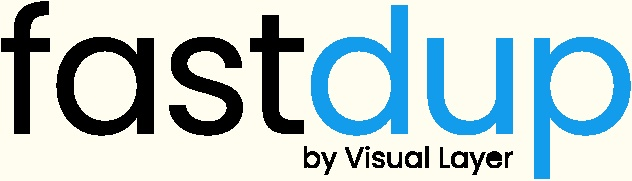
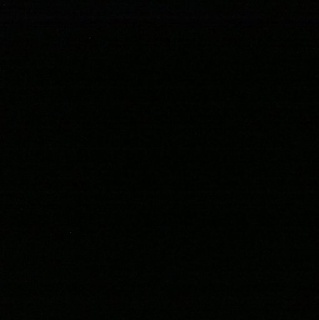
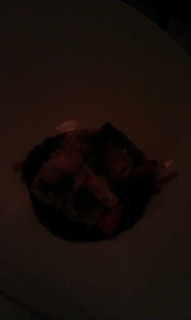
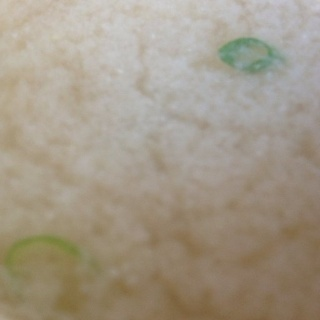
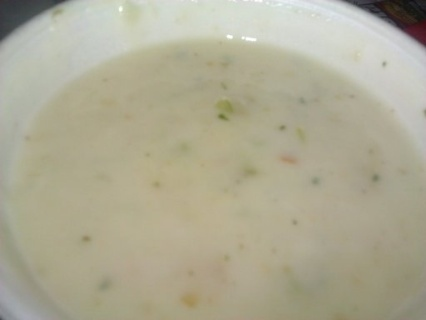
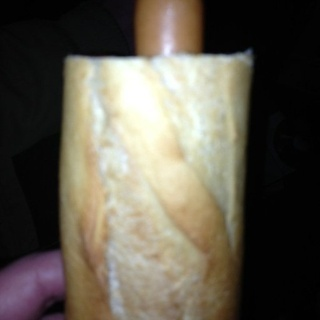
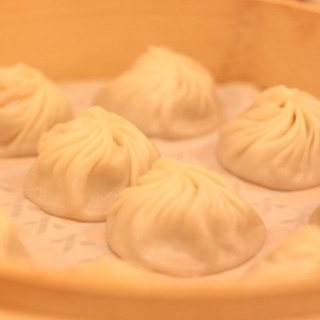
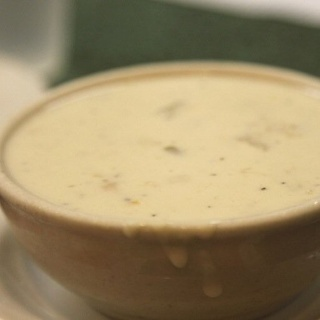
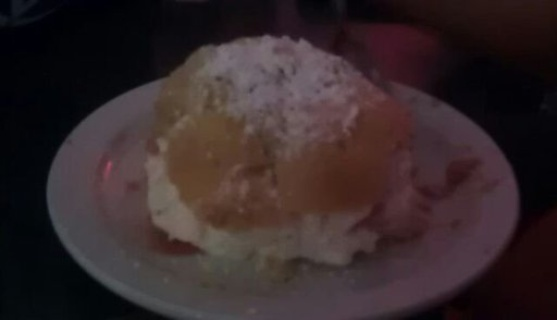
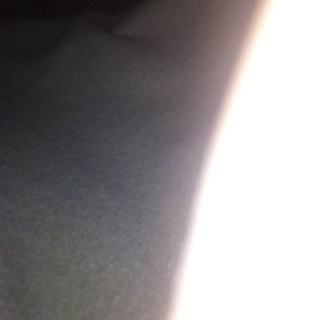
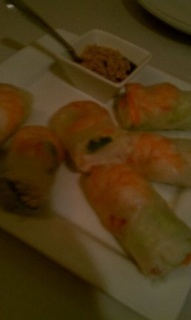
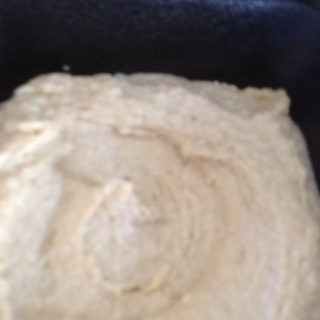
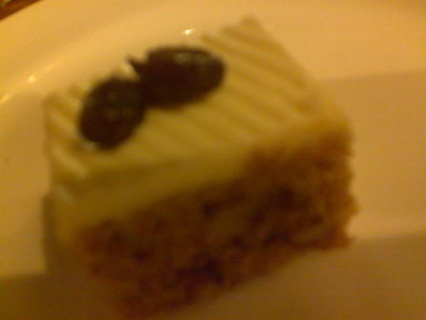
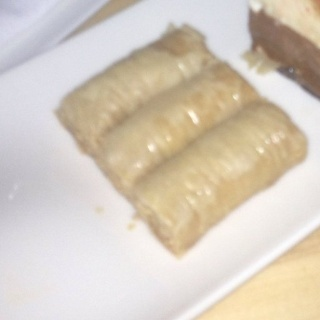
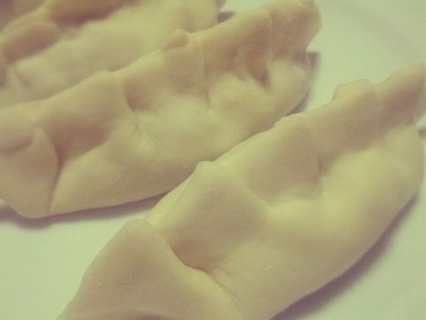
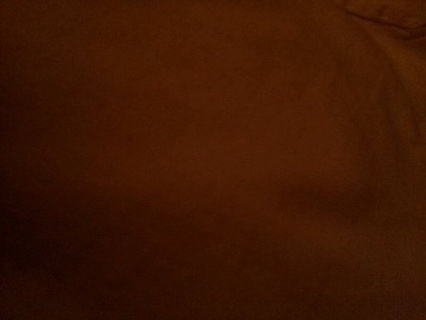
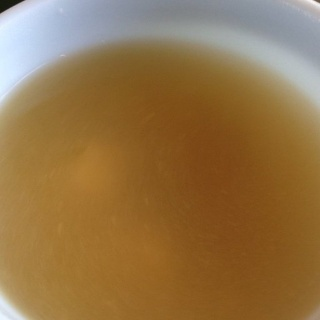
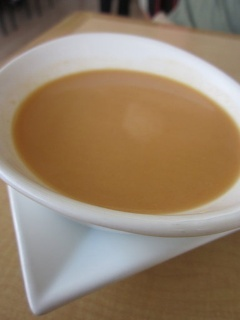
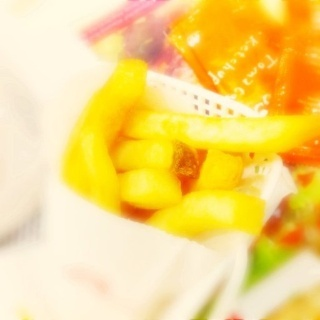
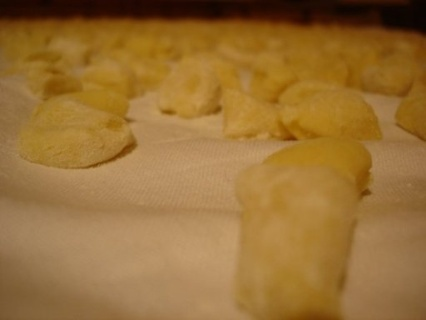
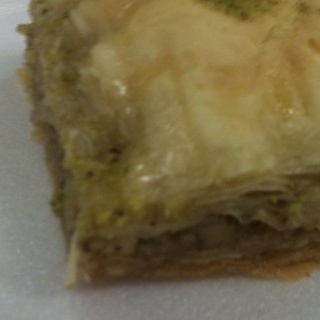
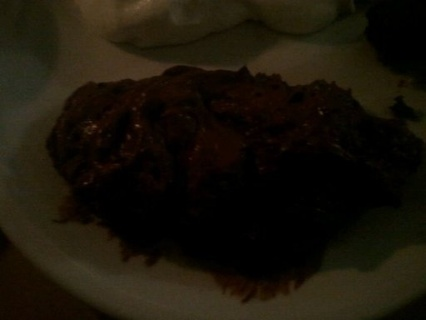
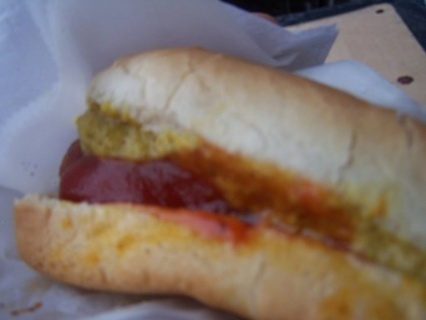
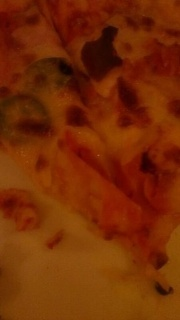
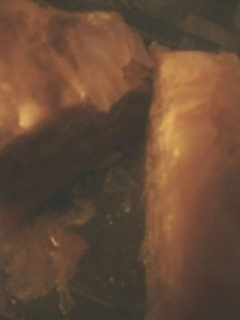
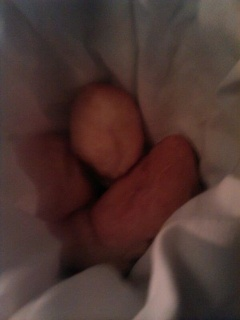

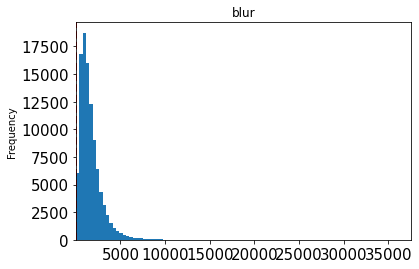

In [22]:
# visualize blurry images
fd.vis.stats_gallery(metric='blur')

100%|██████████| 25/25 [00:00<00:00, 62.25it/s]


Stored mean visual view in  fastdup_food101/galleries/stats_20230301125959/mean.html



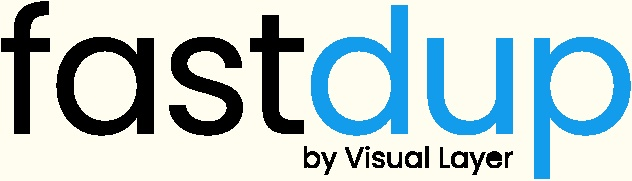
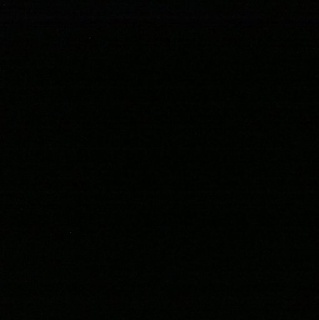
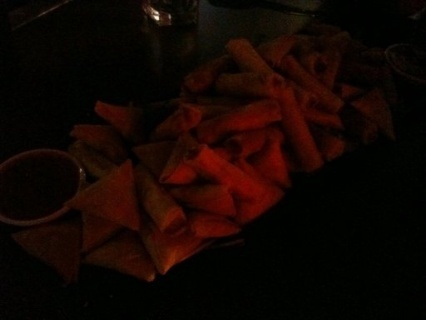
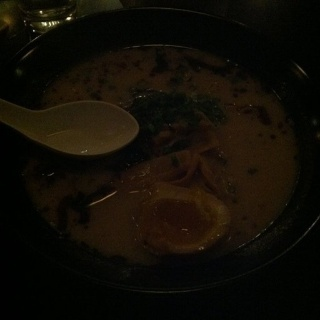
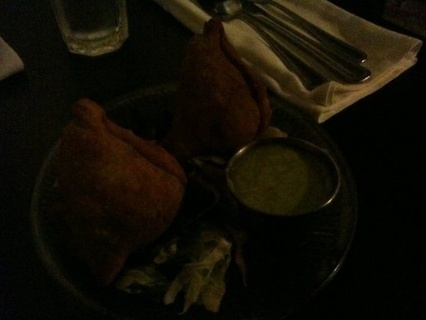
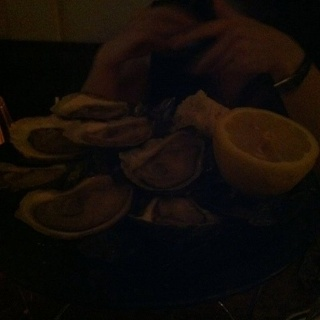
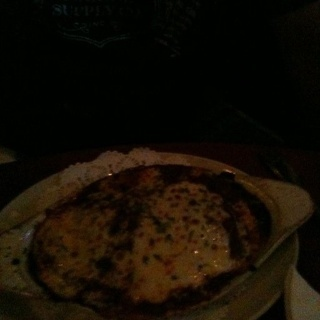
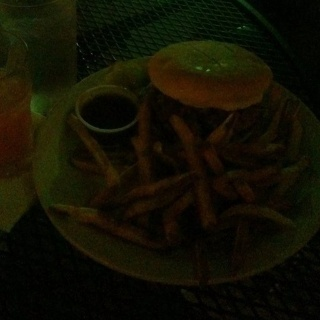
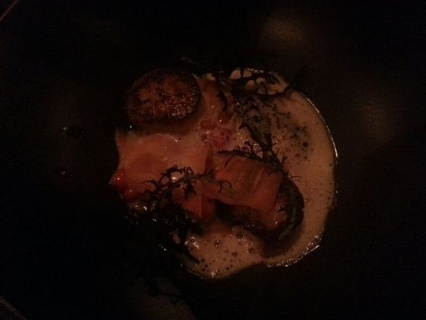
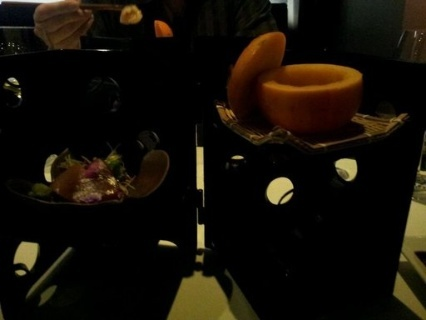
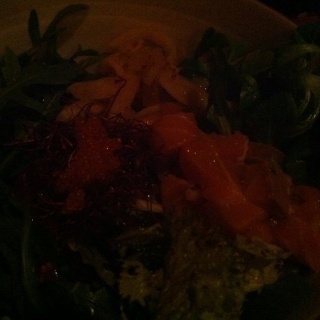
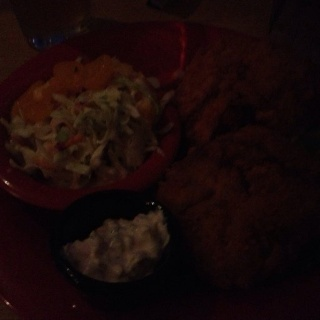
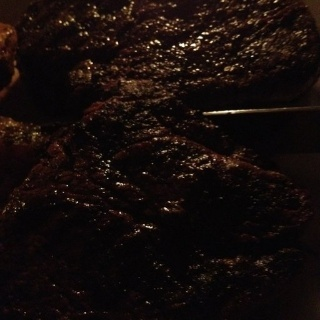
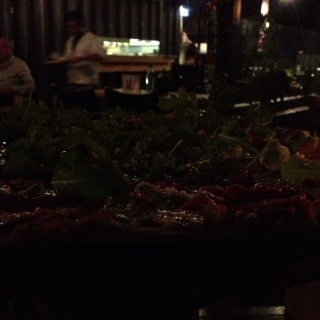
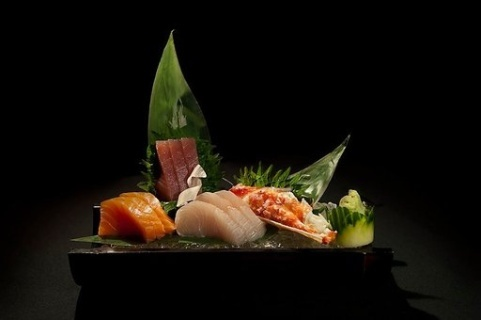
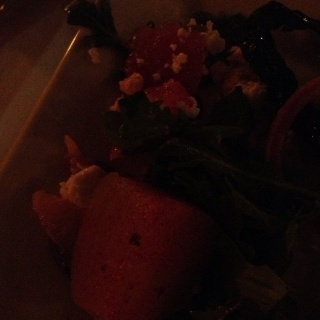
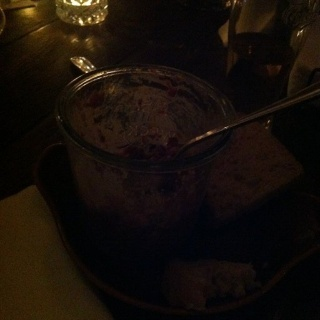
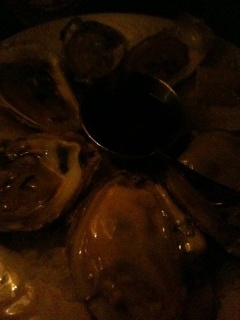
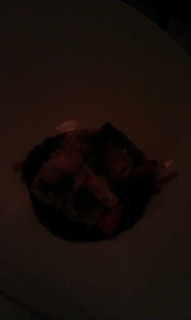
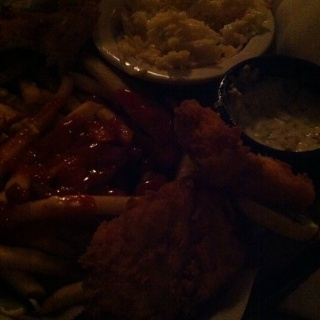
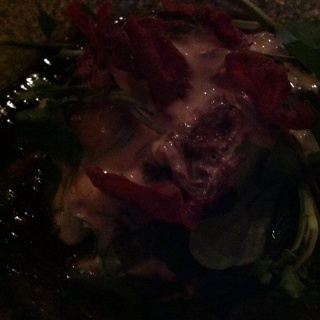
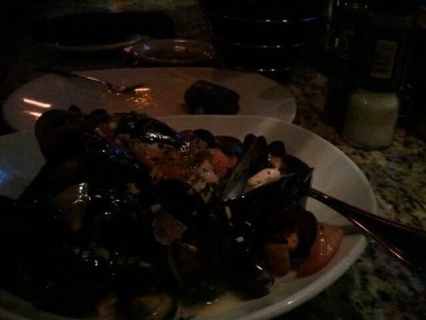
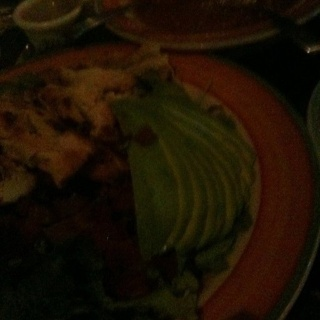
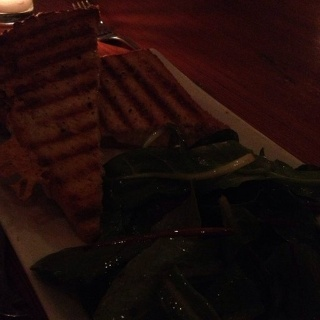
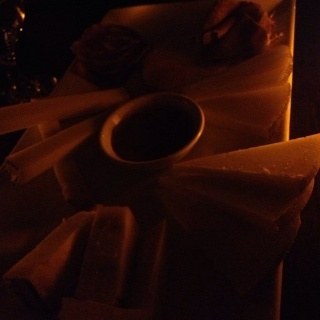
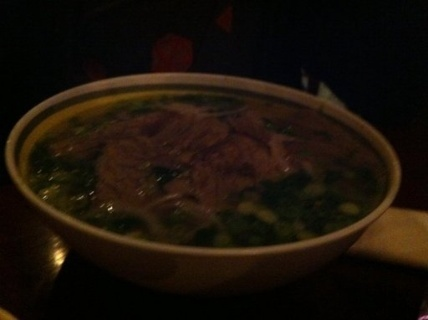

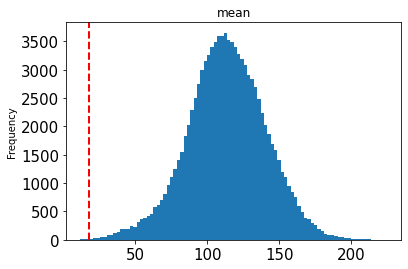

In [23]:
# visualize dark images
fd.vis.stats_gallery(metric='dark')

100%|██████████| 25/25 [00:00<00:00, 77.49it/s]


Stored mean visual view in  fastdup_food101/galleries/stats_20230301130104/mean.html



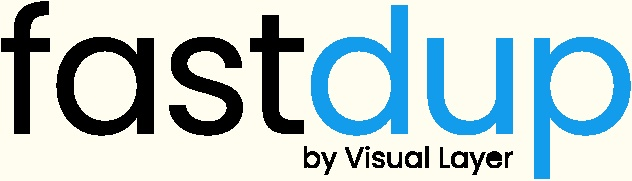
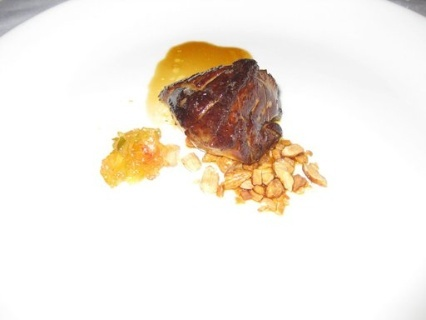
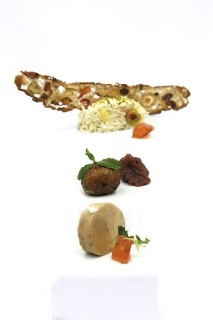
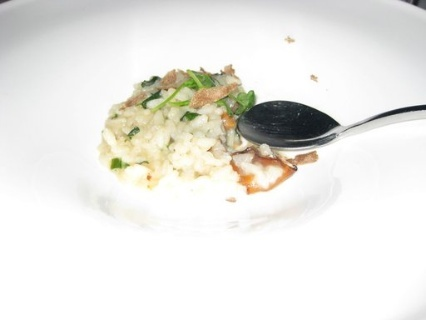
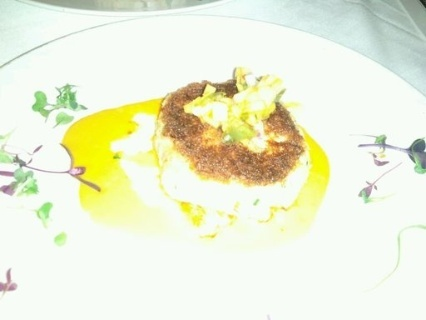
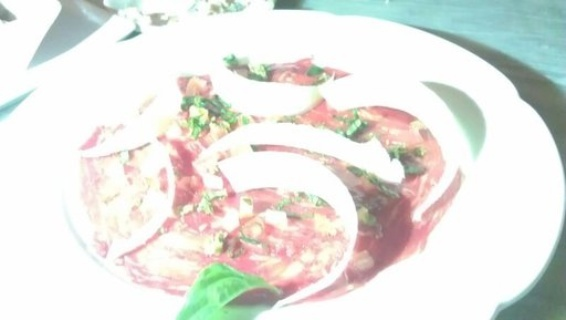
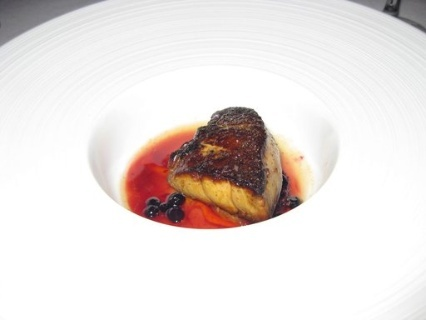
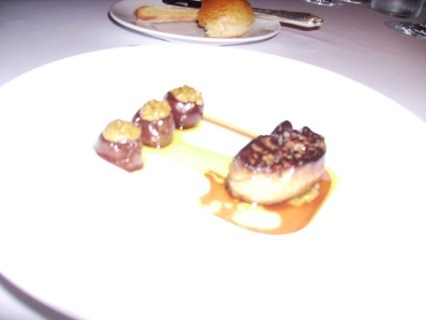
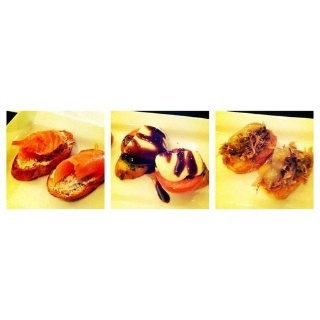
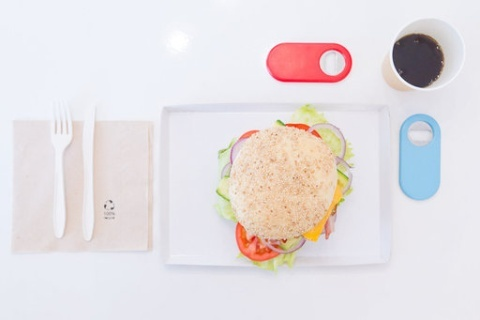
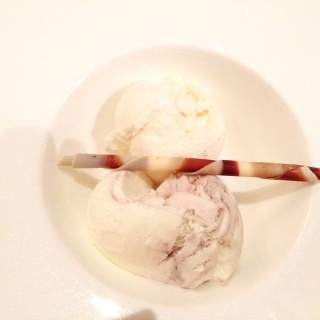
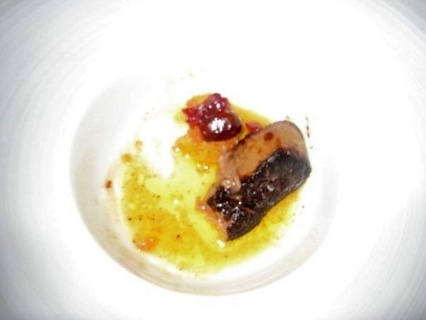
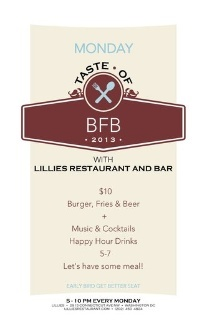
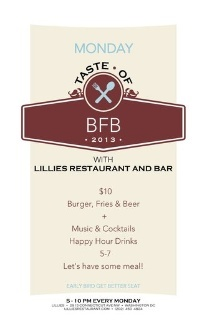
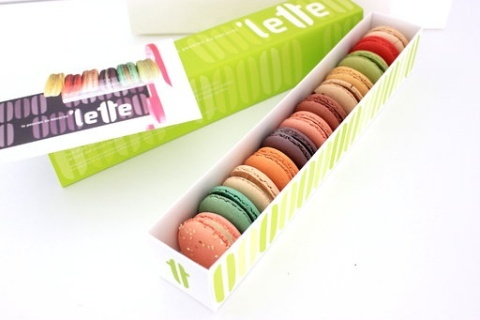
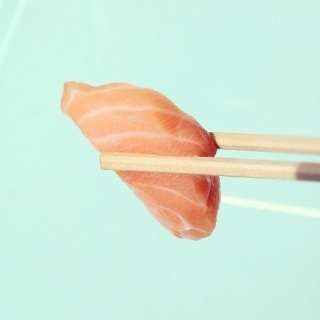
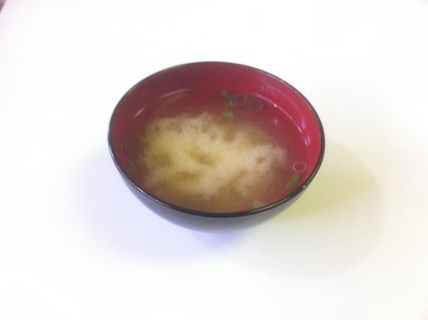
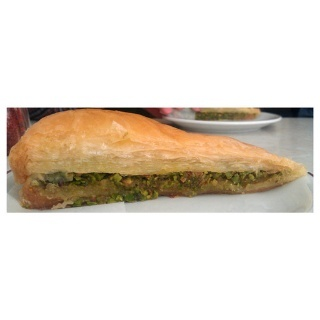
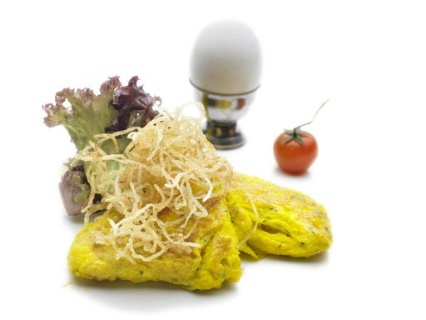
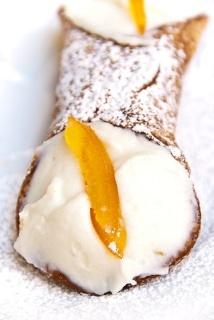
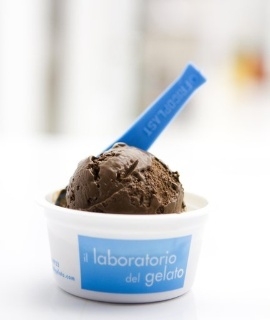
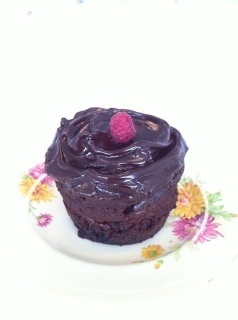
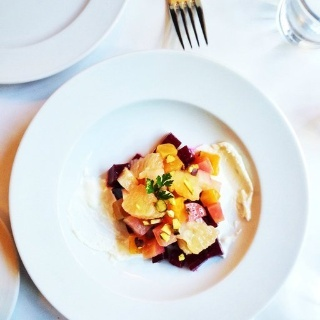
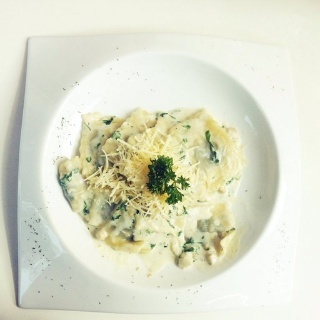
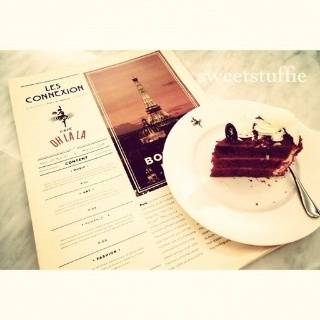
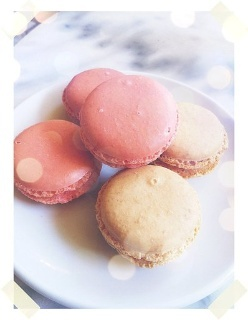

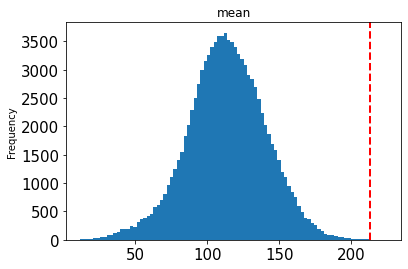

In [24]:
# visualize bright images
fd.vis.stats_gallery(metric='bright')

# Wrap up and collect file list

In [25]:
# let's collect all files to remove
stats_df = fd.img_stats()
outlier_df = fd.outliers()

# for outliers, we'll take images which their closest similarity is lower than 0.68
outliers_filtered = outlier_df[outlier_df.distance < 0.68].img_filename_outlier.tolist()

images_to_remove = dict(
    duplicates = list(cluster_images_to_discard), # the duplicates threshold is 0.9, the same ccthreshold we ran fastdup with
    outliers_to_discard = outliers_filtered,
    invalid_images = fd.invalid_instances(),
    blurry_images = stats_df[stats_df['blur'] < 50], # we'll choose blur threshold as 50
    dark_images = stats_df[stats_df['mean'] < 13], # darkness threshold as 13
    bright_images = stats_df[stats_df['mean'] > 220.5], # and brightness threshold as 220.5
)

In [26]:
# we'll create a set of unique images to remove
images_to_discard = []

for key, data_slice in images_to_remove.items():
    ext = data_slice if isinstance(data_slice, list) else data_slice['img_filename'].tolist()
    print(f"{key}: {len(data_slice)}")
    images_to_discard.extend(ext)
print(f"Total - {len(set(images_to_discard))} unique images")

duplicates: 2153
outliers_to_discard: 174
invalid_images: 0
blurry_images: 30
dark_images: 6
bright_images: 13
Total - 2368 unique images


# Summary 
Even under restrictive thresholds, we have found 2,368 images that should not be included in our labeling or training using this data.